# Measuring fractal dimension by box-counting

## Theory
The term [fractal dimension](https://en.wikipedia.org/wiki/Fractal_dimension) was introduced by Benoit Mandelbrot in 1967 to explain self-similarity of a pattern. A fractal dimension is defined as a ratio of the change in detail to the change in scale. It is used as an index that quantifies the complexity of a fractal pattern. 

Famously, fractal dimensions have been used to analyze the length of the British coastline. A coastline's measured length is observed to change depending on the length of the measuring stick used. In 2-D and 3-D, this notion can be extended to the length of a measuring pixel or voxel, respectively. 


![image](https://upload.wikimedia.org/wikipedia/commons/2/20/Britain-fractal-coastline-combined.jpg)


### Box Counting Method
One way to determine fractal dimension of an image is the [box counting method](https://en.wikipedia.org/wiki/Box_counting). Boxes of various sizes are laid over the image in a fixed grid pattern. The number of boxes that span the edge of the pattern (i.e. partially 1 and partially 0) are tallied as a function of box size. This count is then used to calculate the fractal dimension . 

## Mathematical Definition
The relationship of a pattern's fractal dimension and its measuring element can be expressed as:

$$N	\propto \frac{1}{D^F}$$

$$F = \lim_{D \to 0} \frac{-log N(D)}{log(D)}$$

where:
* N: number of boxes of side D that span an edge
* D: size of the boxes
* F: fractal dimension

## Example
A Sierpinski carpet has a known fractal dimension of 1.8928. Performing the box counting method found its fractal dimension as approximately 1.8 ~ 1.9.

First, import the needed packages.


In [1]:
import matplotlib.pyplot as plt
import porespy as ps
ps.visualization.set_mpl_style()

Generate a sierpinski carpet and visualize.

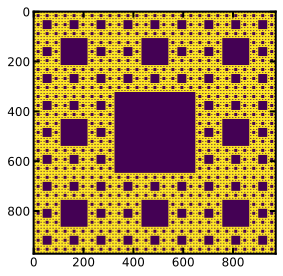

In [2]:
im = ps.generators.sierpinski_foam(4, 5)
plt.imshow(im);

Finally, apply the box count function and visualize.

In [3]:
data = ps.metrics.boxcount(im)

  0%|          | 0/10 [00:00<?, ?it/s]

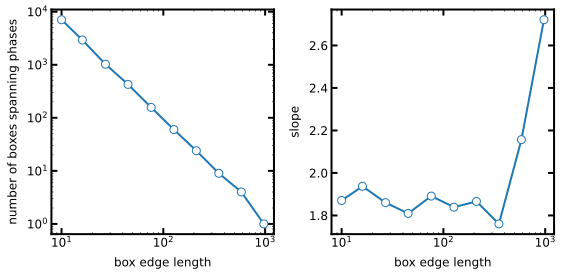

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('box edge length')
ax1.set_ylabel('number of boxes spanning phases')
ax2.set_xlabel('box edge length')
ax2.set_ylabel('slope')
ax2.set_xscale('log')
ax1.plot(data.size, data.count,'-o')
ax2.plot(data.size, data.slope,'-o');

The horizontal portion of the ``slope vs box edge length`` curve, between $10^1$ and $10^2$ is a flat line with a value of approximately 1.9.  Beyond a box edge length of $10^2$ the analysis becomes impacted by the finite image size so the result begins to diverge.